**Ishan Shrimali**

**MIDAS@IIITD Summer Internship/RA Task 2021**

**Task 3: NLP**

*GOAL:*

Use a given dataset to build a model to predict the category using description. Write code in python. Using Jupyter notebook is encouraged. 



1.   Show how you would clean and process the data

2.   Show how you would visualize this data

3.   Show how you would measure the accuracy of the model

4.   What ideas do you have to improve the accuracy of the model? What other algorithms would you try?

**About Data**: You have to clean this data, In the product category tree separate all the categories, figure out the primary category, and then use the model to predict this.

If you want to remove some categories for lack of data, you are also free to do that, mention this with explanation and some visualization.
Questions are made this way to check if candidates are able to understand this.

Note:- 
1) Goal is to predict the product category.
2) Description should be the main feature. Feel free to use other features if it'd improve the model.
3) Include a Readme.pdf file with approach in detail and report the accuracy and what models were used.
 

**Dataset link:**
https://docs.google.com/spreadsheets/d/1pLv0fNE4WHokpJHUIs-FTVnmI9STgog05e658qEON0I/edit?usp=sharing






# 1. Cleaning and processing the dataset

**Below we are importing some libraries for the first part i.e. the data cleaning and processing part. We will import libraries as we move ahead for better understanding and easy explanation as well.**

In [1]:
import pandas as pd #Pandas
import re           #Regular expression
import nltk         #Natural Language Toolkit

In [2]:
import os


In [5]:
os.getcwd()

'C:\\Users\\Ishan\\Downloads'

**We will read the csv file containing our data using pandas.**

In [6]:
df = pd.read_csv('flipkart_dataset.csv')

**Head - The head() function is used to get the first n rows.**

In [7]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


**Describe -describe() is used to view some basic statistical details like count, mean, std etc. of a data frame**

In [8]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


**Info - The info() function is used to print a concise summary of a
DataFrame.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


**Columns - columns() function lists the Name of all the columns in our dataframe**

In [10]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

**Shape- Shows the output of the number of rows and columns in the dataframe**

In [11]:
df.shape

(20000, 15)

**Isnull - isnull() function detect missing values in the given series
object.**

In [12]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

**Description Column will be be the main feature of our model and will be of primary focus in this task.**

In [13]:
df[df['description'].isnull()].index

Int64Index([553, 17299], dtype='int64')

**After checking with the isnull function we found that there are 2 null values in the description column. Let's find the null values.**

In [14]:
print(df['description'][553])
print(df['description'][17299])

nan
nan


**Dropping the null values**

In [15]:
df.drop([553, 17299] , inplace = True)

**Checking a random description**

In [16]:
print(df['description'][23])

Key Features of SWAGGA Women Clogs Occasion: Ethnic Material: Leather Color: Brown, White Heel Height: 0,Specifications of SWAGGA Women Clogs General Occasion Ethnic Ideal For Women Sandal Details Type Clogs Heel Height 0 inch Outer Material Leather Color Brown, White13


**We observed that there a lot of symbols, characters, numbers and extra spaces which are not useful for us in our model. Therefore, we will clean them by defining a function and with the help of Regular Expression library(already imported earlier).**

In [17]:
def dataprepreprocessing_string(str_arg):
    
    output_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) 
    output_str=re.sub('(\s+)',' ',output_str) 
    output_str=output_str.lower() 
    
    return output_str 



**Now we would see what changes are in our string after we appply the "dataprepreprocessing_string" function on it.**

In [18]:
print(df["description"][23])
print('\n')
print(dataprepreprocessing_string(df["description"][23]))

Key Features of SWAGGA Women Clogs Occasion: Ethnic Material: Leather Color: Brown, White Heel Height: 0,Specifications of SWAGGA Women Clogs General Occasion Ethnic Ideal For Women Sandal Details Type Clogs Heel Height 0 inch Outer Material Leather Color Brown, White13


key features of swagga women clogs occasion ethnic material leather color brown white heel height specifications of swagga women clogs general occasion ethnic ideal for women sandal details type clogs heel height inch outer material leather color brown white 


**As we can see all the uppercase have been converted to lowercase, and the symbols and extra spaces have been deleted**

**Other than the description column another important column is the product_category_tree column. We will check this column and it's features now**

In [19]:
df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
5        ["Eternal Gandhi Super Series Crystal Paper We...
6        ["Clothing >> Women's Clothing >> Lingerie, Sl...
7        ["Furniture >> Living Room Furniture >> Sofa B...
8        ["Footwear >> Women's Footwear >> Ballerinas >...
9        ["Clothing >> Women's Clothing >> Lingerie, Sl...
10       ["Footwear >> Women's Footwear >> Ballerinas >...
11       ["Clothing >> Women's Clothing >> Sports & Gym...
12       ["Pet Supplies >> Grooming >> Skin & Coat Care...
13       ["Clothing >> Women's Clothing >> Lingerie, Sl...
14       ["Pens & Stationery >> School Supplies >> Wate...
15       ["Clothing >> Women's Clothing >> Lingerie, Sl...
16       ["Furniture >> Living Room Furniture >> Sofa B.

**Category processing using Lambda function** 

In [20]:
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

**Now we will check out some categories randomy**

In [21]:
print(df['product_category_tree'][0])
print(df["product_category_tree"][5])
print(df['product_category_tree'][10])
print(df["product_category_tree"][20])
print(df['product_category_tree'][50])
print(df["product_category_tree"][100])

Clothing
Eternal Gandhi Super Series Crystal Paper Weight..."]
Footwear
Pet Supplies
Vishudh Printed Women's Straight Kurta"]
Watches


**Checking the number of unique quantaties**

In [22]:
df.product_category_tree.nunique()

266

**Printing the unique categories**

In [23]:
df['product_category_tree'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies',
       'Eternal Gandhi Super Series Crystal Paper Weight..."]',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care',
       'Bengal Blooms Rose Artificial Plant  with Pot (3..."]',
       'Bags, Wallets & Belts', 'Home Decor & Festive Needs',
       'Automotive', 'Tools & Hardware',
       'Vishudh Printed Women\'s Straight Kurta"]',
       'Vishudh Printed Women\'s Anarkali Kurta"]',
       'BuildTrack PIR Wireless Motion Sensor - One Swit..."]',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER..."]',
       'MASARA Solid Women\'s Straight Kurta"]',
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER..."]',
       'Behringer Xenyx 502 Analog Sound Mixer"]',
       'Noor Embroidered Women\'s Straight Kurta"]',
       'Libas Printed Women\'s A-line Kurta"]',
       'Libas Printed Women\'s Anarkali Kurta"]', 'Home Furnishing',
       'Baby Care', 'Mobiles & Accessories', 'Food & Nutriti

**As we can see, there are many examples where the products do not have a definite category.**

**To overcome this issue, we will select only the product categories with maximum entries**

In [24]:
 category_max= list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [25]:
print(category_max)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


**Now we will change our dataframe, df to our preprocessed data frame which contains only the relevant columns**

In [26]:
preprocessed_df = df[df['product_category_tree'].isin(category_max)][['product_category_tree','description']]

In [27]:
preprocessed_df

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...
6,Clothing,Key Features of Alisha Solid Women's Cycling S...
7,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
8,Footwear,"Key Features of dilli bazaaar Bellies, Corpora..."
9,Clothing,Key Features of Alisha Solid Women's Cycling S...
10,Footwear,Key Features of Ladela Bellies Brand: LADELA C...


**With this we conclude our first part of the task where we have cleaned and preprocessed our data**

# 2. Data Visualisation

**Importing some data visualisation libraries**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
preprocessed_df['description'] = preprocessed_df['description'].astype('str').apply(dataprepreprocessing_string)

In [30]:
preprocessed_df

,product_category_tree,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish col...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...
6,Clothing,key features of alisha solid women s cycling s...
7,Furniture,fabhomedecor fabric double sofa bed finish col...
8,Footwear,key features of dilli bazaaar bellies corporat...
9,Clothing,key features of alisha solid women s cycling s...
10,Footwear,key features of ladela bellies brand ladela co...


**Pie Chart - A pie chart is best used when trying to work out the composition of something. If we have categorical data then using a pie chart would work really well as each slice can represent a different category.**

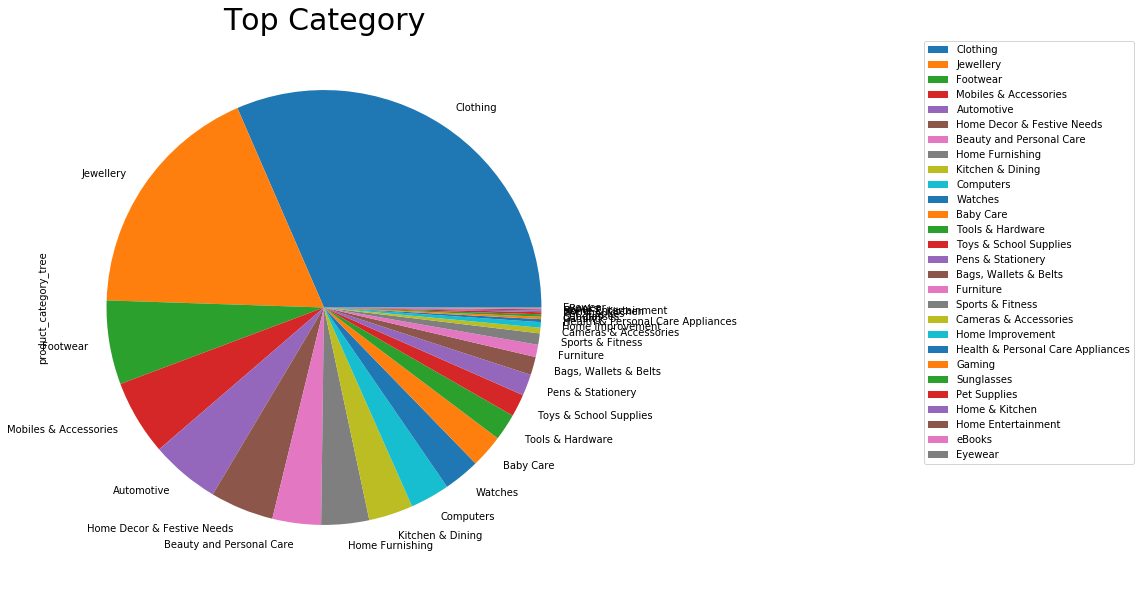

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Gaming                                 35
Sunglasses                             35
Pet

In [31]:
plt.figure(figsize=(15,10))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=False).plot(kind='pie')
plt.title('Top Category',fontsize=30)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(loc="upper right", fontsize ='10', bbox_to_anchor=(2,1))
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

**Bar Plot -Bar plots are an extremely effective visual to use in presentations and reports. They are popular because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.**

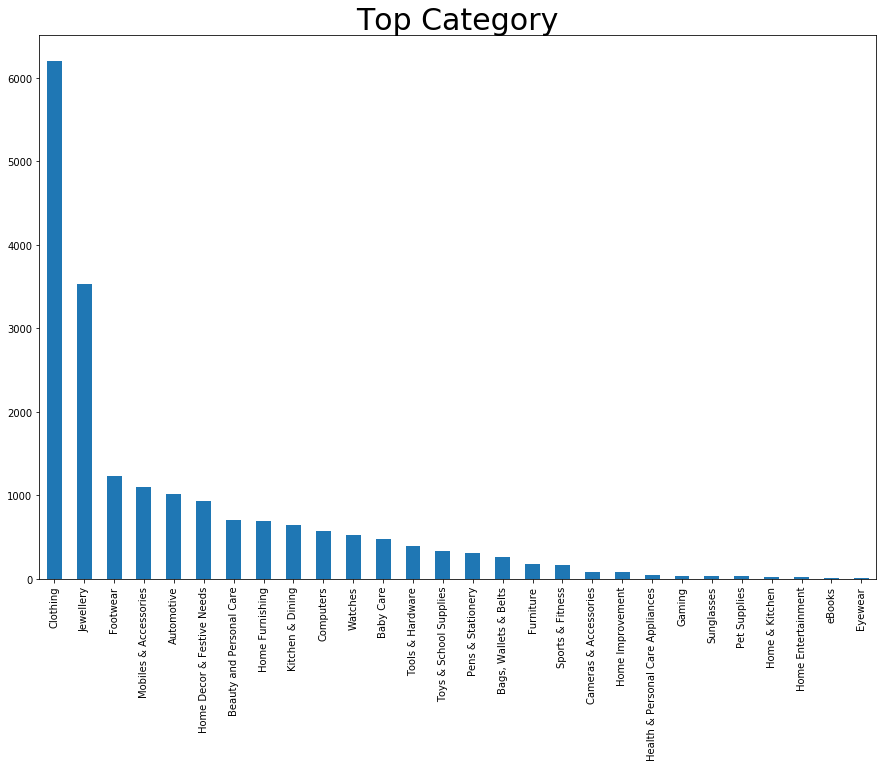

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Gaming                                 35
Sunglasses                             35
Pet

In [32]:
plt.figure(figsize=(15,10))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=False).plot(kind='bar')
plt.title('Top Category',fontsize=30)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

**After visualising our data we got to know that:-<br>
Clothing                             6197<br>
Jewellery                            3531<br>
Footwear                             1227<br>
Mobiles & Accessories                1099<br>
Automotive                           1012<br>
are the main categories and they combine for more than 50% of our data.**

# 3. Model and Accuracy of the model

**For Natural Language Processing (NLP) to work, it always requires to transform natural language (text and audio) into numerical form. Text vectorization techniques namely Bag of Words, Count vectorizer and tf-idf vectorization, which are very popular choices for traditional machine learning algorithms can help in converting text to numeric feature vectors.**

**Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.They are not generally used when length of text is large.**

**In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.**

**In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.**

**Now as stated earlier, we will now import all the libraries required in this section.**

In [53]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score, precision_score, f1_score

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

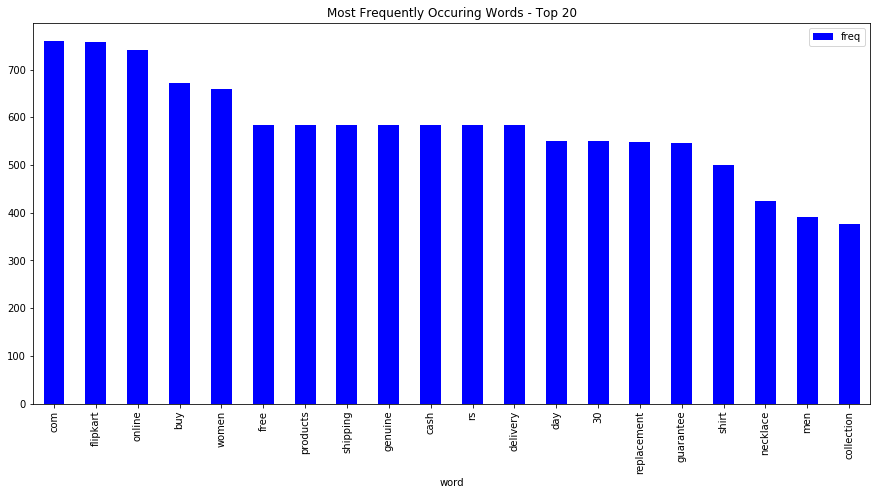

In [56]:
cv = TfidfVectorizer(stop_words = 'english')
words = cv.fit_transform(df.description) 
sum_words = words.sum(axis=0) 

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]    
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)  

frequency = pd.DataFrame(words_freq, columns=['word', 'freq']) 
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 20")

**💡 Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.
One easy way to make a word cloud is to search ‘word cloud’ on Google to find one of those free websites that generate a word cloud. You can possibly customise how it looks like. Quick and easy!**

In [57]:
len(sum_words)

1

In [58]:
print(words[0])

  (0, 6789)	0.05050454917052621
  (0, 5085)	0.19703209448741238
  (0, 8121)	0.07199886331992905
  (0, 23016)	0.062460820092166205
  (0, 4735)	0.06557152152220118
  (0, 6524)	0.08921270193194933
  (0, 25385)	0.08091236237997915
  (0, 15689)	0.11085166293674013
  (0, 25366)	0.07383069876039763
  (0, 15813)	0.08885466933102942
  (0, 12297)	0.10325033294293742
  (0, 7352)	0.06968486149547556
  (0, 13546)	0.054860540634515884
  (0, 18345)	0.06521395721961612
  (0, 12282)	0.04719314804254632
  (0, 24496)	0.05328735383309566
  (0, 11143)	0.12154990369066392
  (0, 18111)	0.05636153793233419
  (0, 18112)	0.05602206199614532
  (0, 21016)	0.056916079985865724
  (0, 8494)	0.0632726852884967
  (0, 17567)	0.054462517574591966
  (0, 9461)	0.18320069994000543
  (0, 22457)	0.04634389319939479
  (0, 20132)	0.07730023898288572
  (0, 17206)	0.22542619125569116
  (0, 15743)	0.22470024871401378
  (0, 8631)	0.12827982750908354
  (0, 21765)	0.5705282174009777
  (0, 9022)	0.43058499242353826
  (0, 25720)	0.133

Text(0.5, 1.0, 'WordCloud')

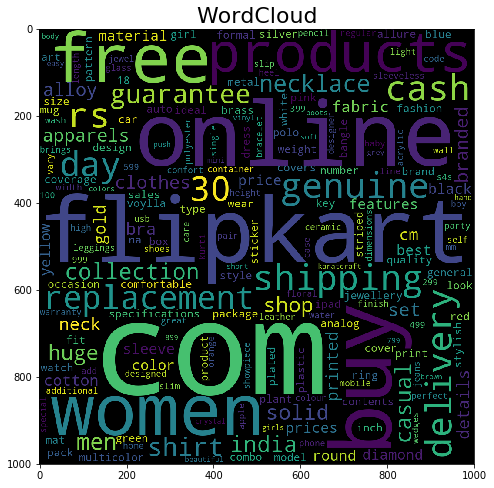

In [59]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud", fontsize = 22)

**This is a great way of visualising which words do we have the most no. of times in our dataset.**

In [63]:
preprocessed_df.head()

,product_category_tree,description
0,5,key features of alisha solid women s cycling s...
1,9,fabhomedecor fabric double sofa bed finish col...
2,8,key features of aw bellies sandals wedges heel...
3,5,key features of alisha solid women s cycling s...
4,21,specifications of sicons all purpose arnica do...


In [64]:
preprocessed_df.shape

(19661, 2)

**Now, we will split our dataset into 2 parts, Training set and testing set <br>
We are splitting our dataset as follows:<br>
Training Data - 75%<br>
Testing Data  - 25%**

In [67]:

X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['description'],preprocessed_df['product_category_tree'],test_size=0.25)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14745,)
(4916,)
(14745,)
(4916,)


In [69]:
print(X_train.head())

15532    lil posh top with skirts girl s combo price rs...
4861     buy allure auto cm car mat toyota etios cross ...
13501    dailyobjects back cover for apple ipad mini re...
16952    buy nkp cotton bath towel at rs at flipkart co...
11030    buy treasure trunk set of regular note pad adh...
Name: description, dtype: object


In [70]:
print(y_train.head())

15532     5
4861      0
13501    19
16952    15
11030    20
Name: product_category_tree, dtype: int64


# Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [73]:
vect = CountVectorizer(analyzer='word', stop_words = 'english')

X_train_matrix = vect.fit_transform(X_train) 

In [74]:
X_train_matrix.shape

(14745, 17099)

In [133]:
vect.vocabulary_

{'lil': 8668,
 'posh': 11459,
 'skirts': 13729,
 'girl': 6243,
 'combo': 3006,
 'price': 11623,
 'rs': 12798,
 'fascinating': 5376,
 'designer': 3953,
 'boutique': 1838,
 'reveals': 12532,
 'magnificent': 9026,
 'party': 10842,
 'couture': 3380,
 'charm': 2556,
 'daughter': 3738,
 'best': 1479,
 'way': 16498,
 'glam': 6263,
 'illuring': 7223,
 'outfit': 10603,
 'tune': 15732,
 'mix': 9589,
 'match': 9229,
 'accessories': 126,
 'varied': 16088,
 'collection': 2958,
 'features': 5464,
 'colour': 2975,
 'nbsp': 10021,
 'black': 1590,
 'amp': 562,
 'white': 16615,
 'coral': 3298,
 'green': 6467,
 'french': 5943,
 'crepe': 3476,
 'strap': 14457,
 'polka': 11368,
 'pattern': 10884,
 'knee': 8222,
 'length': 8570,
 'pleated': 11296,
 'skirt': 13728,
 'dots': 4366,
 'soft': 13939,
 'elasticated': 4701,
 'waistline': 16407,
 'smart': 13839,
 'fit': 5639,
 'casual': 2364,
 'wear': 16517,
 'buy': 2133,
 'allure': 483,
 'auto': 1043,
 'cm': 2874,
 'car': 2264,
 'mat': 9228,
 'toyota': 15474,
 'eti

**Now we will train the vectorized data**

In [76]:


model=MultinomialNB()


model.fit(X_train_matrix, y_train)


print("Accuracy of model on training data is:" , model.score(X_train_matrix, y_train))

Accuracy of model on training data is: 0.9503560528992879


**We have achieved 95% accuracy which is a good result.**

**Now we will repeat the same process with the testing data**

In [77]:

X_test_matrix = vect.transform(X_test) 

print ("Accuracy of model on testing data is:", model.score(X_test_matrix, y_test))

Accuracy of model on testing data is: 0.9265663140764849


**We have achieved 92.65% accuracy with the testing dataset.**

**Let us find out the time taken by our model**

In [78]:

%time model.fit(X_train_matrix, y_train)

Wall time: 130 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

1. accuracy_score : to test the accuracy of our model it tells how correct our model is performing.

2. F1-score it measure accuracy of model on a dataset. 
   **- F1 = 2 * (precision * recall) / (precision + recall)

3. Recall = TP/(TP+FN) and precision = TP/(TP+FP)

4. precision Score




In [79]:
predicted_result=model.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       265
           1       0.87      0.63      0.73       131
           2       0.76      0.55      0.64        64
           3       0.81      0.92      0.86       167
           4       1.00      0.21      0.35        19
           5       0.98      0.99      0.98      1520
           6       0.83      0.74      0.78       141
           7       1.00      0.33      0.50         3
           8       0.97      0.94      0.96       322
           9       0.87      0.98      0.92        41
          10       1.00      0.44      0.62         9
          11       1.00      1.00      1.00         8
          12       1.00      0.38      0.55         8
          13       0.91      0.98      0.94       226
          15       0.92      1.00      0.96       170
          16       1.00      0.40      0.57        25
          17       0.88      1.00      0.94       884
          18       0.96    

C:\Users\Ishan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ishan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ishan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
nr_correct = (y_test == model.predict(vect.transform(X_test))).sum()

In [134]:
print("Out of the ", X_test.shape ,"target categories which we considered, the model predicted", nr_correct, "categories correctly")

Out of the  (4916,) target categories which we considered, the model predicted 4555 categories correctly


**With this we have seen how the Count Vectorizer model performs on the given datset and also conclude the 3rd part**

#  4. What ideas do you have to improve the accuracy of the model? What other algorithms would you try?


**Now after trying out the Count Vectorizer model, we will now try the TF-IDF model**

### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

**We will now begin with the TF-IDF model by converting our training data to TF-IDF form**

In [81]:
vectorizer = TfidfVectorizer(analyzer = 'word' , stop_words = 'english')

X_train_tfidf = vectorizer.fit_transform(X_train)

**Now we will train the vectorized data**

In [82]:

model2=MultinomialNB()

model2.fit(X_train_tfidf, y_train)

print("Accuracy of model on training data:" , model2.score(X_train_tfidf, y_train))

Accuracy of model on training data: 0.880637504238725


**We have achieved 88% accuracy which is not as good as the count vectorizer method.**

**Now we will repeat the same process with the testing data**

In [86]:

X_test_tfidf = vectorizer.transform(X_test) 


print ("Accuracy of model on testing data:" , model2.score(X_test_tfidf, y_test))

Accuracy of model on testing data: 0.8527257933279089


**We achieved 85 % accuracy which is very less when compared to the count vectorizer method**

**Till now we have seen how our model performs on the accuracy part now let's check whether our model can predict the category as well or not**

In [149]:
# Taking only top categories
top_categories = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [150]:
print(top_categories)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


In [151]:
processed_df = df[df['product_category_tree'].isin(top_categories)][['product_category_tree','description']]

In [152]:
cat_list = list(processed_df['product_category_tree'].unique())

In [153]:
print(cat_list)

['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Pens & Stationery', 'Sports & Fitness', 'Beauty and Personal Care', 'Bags, Wallets & Belts', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers', 'Cameras & Accessories', 'Health & Personal Care Appliances', 'Gaming', 'Home Improvement', 'Sunglasses', 'Home Entertainment', 'Eyewear', 'eBooks']


In [154]:
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded

In [155]:
for i in range(28):
    print(str(i) + "-" + le.inverse_transform([i]))

['0-Automotive']
['1-Baby Care']
['2-Bags, Wallets & Belts']
['3-Beauty and Personal Care']
['4-Cameras & Accessories']
['5-Clothing']
['6-Computers']
['7-Eyewear']
['8-Footwear']
['9-Furniture']
['10-Gaming']
['11-Health & Personal Care Appliances']
['12-Home & Kitchen']
['13-Home Decor & Festive Needs']
['14-Home Entertainment']
['15-Home Furnishing']
['16-Home Improvement']
['17-Jewellery']
['18-Kitchen & Dining']
['19-Mobiles & Accessories']
['20-Pens & Stationery']
['21-Pet Supplies']
['22-Sports & Fitness']
['23-Sunglasses']
['24-Tools & Hardware']
['25-Toys & School Supplies']
['26-Watches']
['27-eBooks']


In [156]:
X_test

5332     specifications of italian fashion wt analog wa...
17132    theskinmantra sleeve for all versions of apple...
16700    inmark men s striped formal shirt price rs put...
2894     jsr paris beauty pro women s full coverage bra...
3939     buy allure auto cm car mat chevrolet aveo for ...
17054    theskinmantra sleeve for all versions of apple...
3419     funku fashion loafers buy funku fashion loafer...
4478     zakaah jewels sterling silver plated stone nec...
18190    buy ecraftindia floral single quilts comforter...
19089    key features of czds india shoulder bag ideal ...
19840    buy wallmantra large vinyl stickers sticker fo...
11439    zeneme alloy cubic zirconia yellow gold bangle...
12920    buy toyhouse radio remote control range rover ...
12875    buy enthopia back cover for ipad mini ipad min...
2363     hemali fashion women s full coverage bra buy b...
799      kundali pukhraj stone weight carat ratti gold ...
5853     indian fashion guru artificial jewellery ceram.

In [157]:
test_desc = X_test[3099]
test_desc

'eshopitude disk break lock zargv hondainterceptor u lock blue price rs hardened steel locking pin ensures protection against drilling sawing and cutting material steel iron zinc alloy impact resistant solid cast metal super hard anti theft disc lock color blue two set of keys eshopitude s bike disk break lock is a must for the security if your ride be it a bike scooter or scooty it has hardened steel locking pin which ensures protection against drilling sawing and cutting main material used are steel iron and zinc alloy it has impact resistant solid cast metal and super hard anti theft disc lock color blue material stainless steel alloy abs suitable for disc break of motorcycle bicycle and electric car use anti theft function easy to use packing list x lock x keys dimensions in x in x in cm x cm x cm weight oz g hardened steel locking pin ensures protection against drilling sawing and cutting material steel iron zinc alloy impact resistant solid cast metal super hard anti theft disc l

In [158]:
le.inverse_transform(model.predict(vect.transform([test_desc])))

array(['Automotive'], dtype=object)

**Hence, we notice that it predicts the correct category, 'Automotive'**

**Rather than focussing on and using too many models, I have confined myself to two models as well as presenting the notebook in a detailed manner.<br>
There is a markdown text before each line of code suggesting what it does and the notebook has been divided into 4 sections as asked in the task.**

**Considering that we didn't left out the categories and trained on 19661 rows our model achieved 95% accuracy on the training data and 92.65% on the testing data.**


# Thank You